# 11.6. Applying digital filters to speech sounds

In [4]:
from io import BytesIO
import tempfile
import requests
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

In [5]:
def speak(data):
    # We convert the mp3 bytes to wav.
    audio = pydub.AudioSegment.from_mp3(BytesIO(data))
    with tempfile.TemporaryFile() as fn:
        wavef = audio.export(fn, format='wav')
        wavef.seek(0)
        wave = wavef.read()
    # We get the raw data by removing the 24 first
    # bytes of the header.
    x = np.frombuffer(wave, np.int16)[24:] / 2.**15
    return x, audio.frame_rate

In [6]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [7]:
url = ('https://github.com/ipython-books/'
       'cookbook-2nd-data/blob/master/'
       'voice.mp3?raw=true')
voice = requests.get(url).content

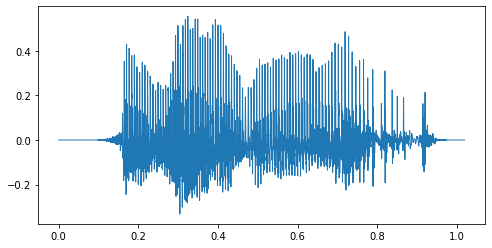

In [8]:
x, fr = speak(voice)
play(x, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x) / fr, len(x))
ax.plot(t, x, lw=1)

In [9]:
b, a = sg.butter(4, 500. / (fr / 2.), 'low')
x_fil = sg.filtfilt(b, a, x)

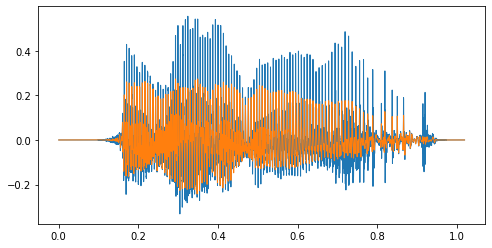

In [10]:
play(x_fil, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=1)
ax.plot(t, x_fil, lw=1)

In [11]:
b, a = sg.butter(4, 1000. / (fr / 2.), 'high')
x_fil = sg.filtfilt(b, a, x)

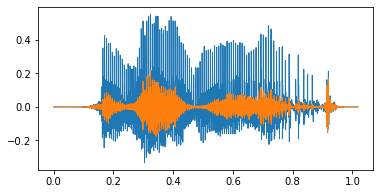

In [12]:
play(x_fil, fr)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(t, x, lw=1)
ax.plot(t, x_fil, lw=1)

In [13]:
from ipywidgets import widgets

@widgets.interact(t=(100., 5000., 100.))
def highpass(t):
    b, a = sg.butter(4, t / (fr / 2.), 'high')
    x_fil = sg.filtfilt(b, a, x)
    play(x_fil, fr, autoplay=True)

interactive(children=(FloatSlider(value=2500.0, description='t', max=5000.0, min=100.0, step=100.0), Output())…